In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

The Trapezoidal rule for numerical integration is:

$$\int_{a}^{b} f(x)dx = \sum_{n=0}^{N-1}\frac{1}{2}(f_n + f_{n+1})(\Delta x)_n$$

Here, all the $\Delta x$ are found for spacing between each data point, and the $0.5*(f_n + f_{n+1})$ as well.

At the first point, $n=0$, the $Cp_{avg}$ is $0.5*(f_0 + f_{1})$, and so on.

This is multipled by the $\Delta x$ array and finally divided by the chord length. Hence, the final formula of the **magnitude** of lift coefficient is

$$C_L = \frac{1}{L}\int_{0}^{L} Cp(x)dx$$

where, $L = $ chord length

In [3]:
df1 = pd.read_csv('trial_cp_plot.csv')

In [ ]:
df1

In [8]:
def trap_plot(df):
    dx = np.diff(df['x'])
    cps = df['Cp'].values
    cp_avg = (cps[:-1] + cps[1:])
    print(dx.shape, cp_avg.shape)
    lift = np.sum(dx*cp_avg)
    c = 1
    L = L = lift / c
    print(f'\nLift Coefficient = {L/2}')
    plt.figure(figsize = (13, 7))
    plt.plot(df['x'], df['Cp'])
    plt.xlabel('x')
    plt.ylabel('Cp')
    plt.show()

(199,) (199,)

Lift Coefficient = 0.42760918225


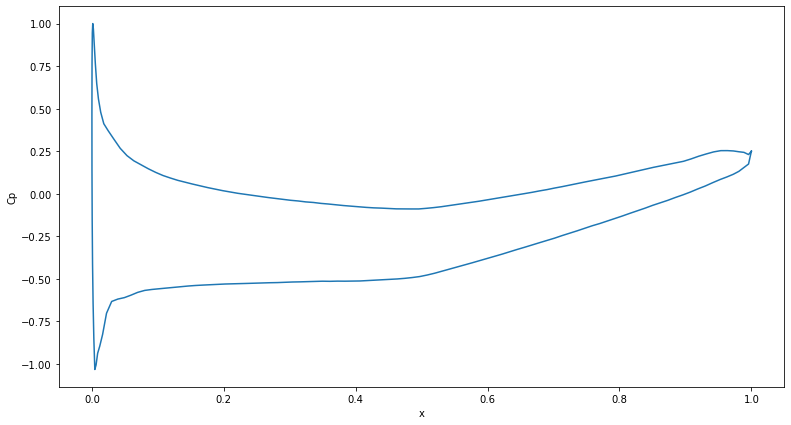

In [9]:
trap_plot(df1)

This is for an inviscid flow. THe CL calculated is correct w.r.t XFOIL

(199,) (199,)

Lift Coefficient = 0.60543334445


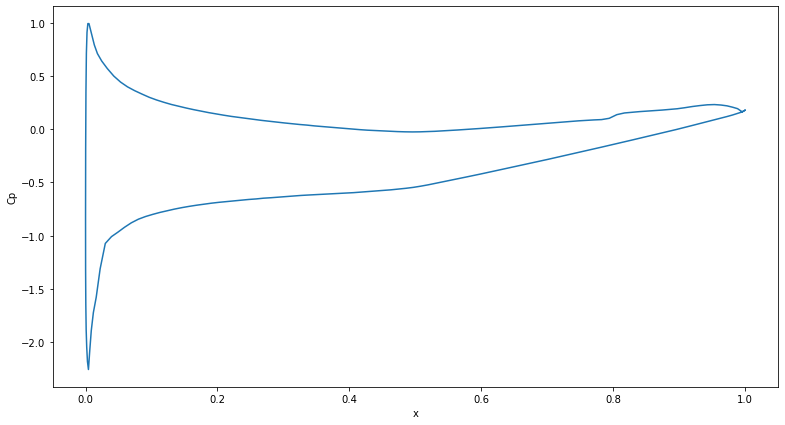

In [10]:
df2 = pd.read_csv('trial_cp_visc.csv')
trap_plot(df2)

As per XFOIL it is 0.6068, not deviating much

(199,) (199,)

Lift Coefficient = 0.6058966615


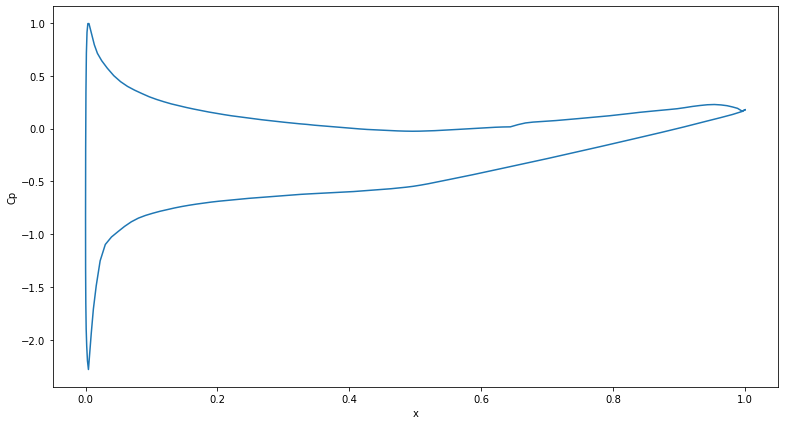

In [15]:
df3 = pd.read_csv('trial_cp_visc_ncr.csv')
trap_plot(df3)

In XFOIL it is 0.6073. Close

And also, with $N_{cr} = 9$ value is $0.6068$ and with $N_{cr} = 2$ value is $0.6073$

The plots look like:

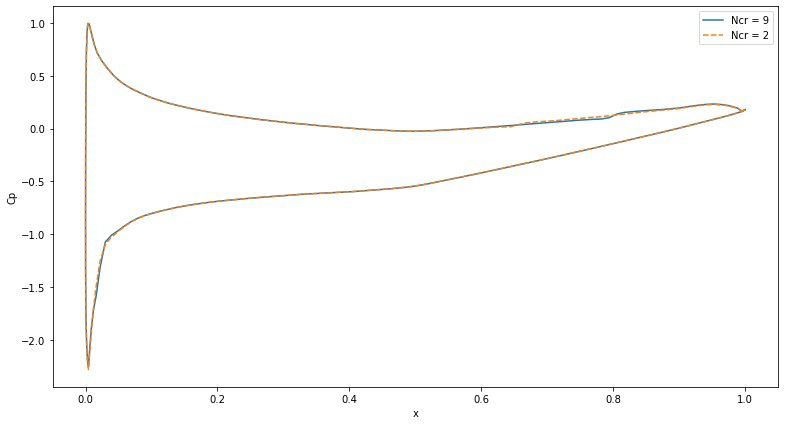

In [23]:
plt.figure(figsize = (13, 7))
plt.plot(df2['x'], df2['Cp'], label = 'Ncr = 9')
plt.plot(df3['x'], df3['Cp'], linestyle = '--', label = 'Ncr = 2')
plt.xlabel('x')
plt.ylabel('Cp')
plt.legend()
plt.show()

In [26]:
# Using plotly
trace1 = go.Scatter(x=df2['x'], y=df2['Cp'], mode='lines', name='Ncr = 9')
trace2 = go.Scatter(x=df3['x'], y=df3['Cp'], mode='lines', name='Ncr = 2', line=dict(dash='dash'))

# Create layout
layout = go.Layout(
    title='Pressure Coefficient vs. x',
    xaxis=dict(title='x', range=[-0.05, 1]),
    yaxis=dict(title='Cp'),
    width=900,
    height=500,
)

# Create figure object
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show plot
fig.show()
